In [1]:
import pandas as pd
import numpy as np

In [28]:
from sklearn import cross_validation, grid_search, metrics, ensemble

C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_test=pd.read_csv('test_offline.csv')

In [5]:
df_train=pd.read_csv('train_offline.csv')

In [6]:
print(df_test.shape)
print(df_train.shape)

(594142, 6)
(1160742, 7)


In [7]:
df_train.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
2,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
3,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN
4,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN


In [8]:
df_test.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,1439408,4663,11002.0,150:20,1.0,20160528.0
1,1439408,2632,8591.0,20:1,0.0,20160613.0
2,1439408,2632,NaN,NaN,0.0,NaN
3,1439408,2632,8591.0,20:1,0.0,20160516.0
4,2029232,450,1532.0,30:5,0.0,20160530.0


In [9]:
def label(row):
    if np.isnan(row['Date_received']):
        return -1
    if not np.isnan(row['Date']):
        td = pd.to_datetime(row['Date'], format='%Y%m%d') -  pd.to_datetime(row['Date_received'], format='%Y%m%d')
        if td <= pd.Timedelta(15, 'D'):
            return 1
    return 0

In [10]:
df_train["label"] = df_train.apply(label, axis=1)

In [11]:
train_date = (df_train['Date'])
train_label= df_train['label']
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
#將salepricedrop掉
df_train.drop('Date',axis=1,inplace = True)
df_train.drop('label',axis=1,inplace=True)
df = pd.concat((df_train, df_test)).reset_index(drop=True)


In [12]:
df

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,1439408,2632,NaN,NaN,0.0,NaN
1,1439408,2632,8591.0,20:1,0.0,20160217.0
2,1439408,2632,1078.0,20:1,0.0,20160319.0
3,1832624,3381,7610.0,200:20,0.0,20160429.0
4,2029232,3381,11951.0,200:20,1.0,20160129.0
5,2223968,3381,9776.0,10:5,2.0,20160129.0
6,73611,2099,12034.0,100:10,NaN,20160207.0
7,163606,1569,5054.0,200:30,10.0,20160421.0
8,3273056,4833,7802.0,200:20,10.0,20160130.0
9,94107,3381,7610.0,200:20,2.0,20160412.0


In [13]:
def getWeekday(row):
    if (np.isnan(row)) or (row==-1):
        return row
    else:
        return pd.to_datetime(row, format = "%Y%m%d").dayofweek+1

In [14]:
df['weekday'] = df['Date_received'].apply(getWeekday)

In [15]:
# weekday_type (weekend = 1)
df['weekday_type'] = df['weekday'].astype('str').apply(lambda x : 1 if x in ['6.0','7.0'] else 0 ) # apply to trainset

In [16]:
Counter(df.weekday_type)

Counter({0: 1402059, 1: 352825})

In [17]:
weekdaycols = ['weekday_' + str(i) for i in range(1,8)]
print(weekdaycols)

tmpdf = pd.get_dummies(df['weekday'].replace(-1, np.nan))
tmpdf.columns = weekdaycols
df[weekdaycols] = tmpdf

['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']


In [18]:
len(df)

1754884

In [19]:
def getDiscountType(row):
    if row == 'null':
        return 'null'
    elif ':' in row:
        return 1
    else:
        return 0

def convertRate(row):
    """Convert discount to rate"""
    if row == 'null':
        return 1.0
    elif ':' in row:
        rows = row.split(':')
        return 1.0 - float(rows[1])/float(rows[0])
    else:
        return float(row)

def getDiscountMan(row):
    if ':' in row:
        rows = row.split(':')
        return int(rows[0])
    else:
        return 0

def getDiscountJian(row):
    if ':' in row:
        rows = row.split(':')
        return int(rows[1])
    else:
        return 0

def processData(df):
    
    # convert discunt_rate
    df['discount_rate'] = df['Discount_rate'].astype('str').apply(convertRate)
    df['discount_man'] = df['Discount_rate'].astype('str').apply(getDiscountMan)
    df['discount_jian'] = df['Discount_rate'].astype('str').apply(getDiscountJian)
    df['discount_type'] = df['Discount_rate'].astype('str').apply(getDiscountType)
    
    # convert distance
    df.loc[df.Distance.isna(), "Distance"] = 99
    return df

In [20]:
df = processData(df)

In [21]:
df.drop('Discount_rate',inplace=True,axis=1)

In [22]:
df.head()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,weekday,weekday_type,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,discount_rate,discount_man,discount_jian,discount_type
0,1439408,2632,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,0
1,1439408,2632,8591.0,0.0,20160217.0,3.0,0,0,0,1,0,0,0,0,0.95,20,1,1
2,1439408,2632,1078.0,0.0,20160319.0,6.0,1,0,0,0,0,0,1,0,0.95,20,1,1
3,1832624,3381,7610.0,0.0,20160429.0,5.0,0,0,0,0,0,1,0,0,0.90,200,20,1
4,2029232,3381,11951.0,1.0,20160129.0,5.0,0,0,0,0,0,1,0,0,0.90,200,20,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 18 columns):
User_id          int64
Merchant_id      int64
Coupon_id        float64
Distance         float64
Date_received    float64
weekday          float64
weekday_type     int64
weekday_1        uint8
weekday_2        uint8
weekday_3        uint8
weekday_4        uint8
weekday_5        uint8
weekday_6        uint8
weekday_7        uint8
discount_rate    float64
discount_man     int64
discount_jian    int64
discount_type    int64
dtypes: float64(5), int64(6), uint8(7)
memory usage: 159.0 MB


In [24]:
df.head()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,weekday,weekday_type,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,discount_rate,discount_man,discount_jian,discount_type
0,1439408,2632,NaN,0.0,NaN,NaN,0,0,0,0,0,0,0,0,NaN,0,0,0
1,1439408,2632,8591.0,0.0,20160217.0,3.0,0,0,0,1,0,0,0,0,0.95,20,1,1
2,1439408,2632,1078.0,0.0,20160319.0,6.0,1,0,0,0,0,0,1,0,0.95,20,1,1
3,1832624,3381,7610.0,0.0,20160429.0,5.0,0,0,0,0,0,1,0,0,0.90,200,20,1
4,2029232,3381,11951.0,1.0,20160129.0,5.0,0,0,0,0,0,1,0,0,0.90,200,20,1


資料最後處理

In [25]:
#將train資料和test資料分開
train = df[:ntrain]
test = df[ntrain:]

In [26]:
train['label']=train_label

C:\Users\a0970\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
train = train[train['label'] != -1]

In [29]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(train[train.columns[train.columns != 'label']], train.label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
df_plot = pd.DataFrame({'features': train.columns[train.columns != 'label'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

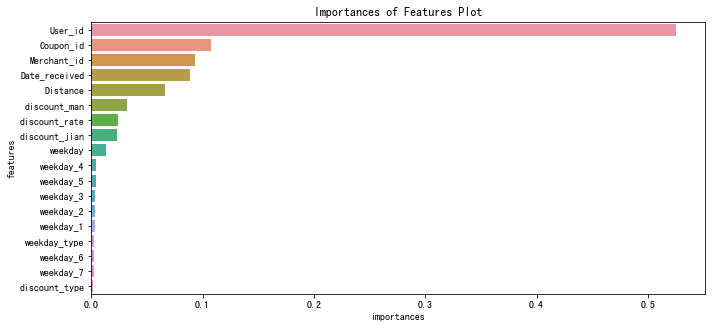

In [32]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [36]:
target_list=df_plot.features[df_plot.importances >0.01].tolist()

In [37]:
train_labels= train['label']

In [38]:
train.drop('label',axis=1,inplace=True)

In [39]:
train.shape

(746969, 18)

In [40]:
test.shape

(594142, 18)

In [41]:
test= test[~test.Coupon_id.isna()]
test.reset_index(drop=True, inplace=True)

In [42]:
test.shape

(306313, 18)

In [43]:
test.head()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,weekday,weekday_type,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,discount_rate,discount_man,discount_jian,discount_type
0,1439408,4663,11002.0,1.0,20160528.0,6.0,1,0,0,0,0,0,1,0,0.866667,150,20,1
1,1439408,2632,8591.0,0.0,20160613.0,1.0,0,1,0,0,0,0,0,0,0.950000,20,1,1
2,1439408,2632,8591.0,0.0,20160516.0,1.0,0,1,0,0,0,0,0,0,0.950000,20,1,1
3,2029232,450,1532.0,0.0,20160530.0,1.0,0,1,0,0,0,0,0,0,0.833333,30,5,1
4,2029232,6459,12737.0,0.0,20160519.0,4.0,0,0,0,0,1,0,0,0,0.950000,20,1,1


# Model Training

In [46]:
train=train[target_list]

In [47]:
test=test[target_list]

In [48]:
from sklearn import cross_validation, grid_search, metrics, ensemble
from sklearn.metrics import roc_auc_score, accuracy_score
import xgboost as xgb

In [49]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(train,train_labels, test_size = 0.2)

In [51]:
model = xgb.XGBClassifier()
# Create parameters grid

parameters_grid = { 'learning_rate' : [0.1, 0.2, 0.5], 'max_depth' : [5, 10, 15], 'n_estimators' : [150, 250, 300], 'min_child_weight' : [3, 5, 10] }

# Strategy of cross validation

#cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 3, test_size = 0.3)

# Create Grid search Strategy

grid_cv = grid_search.RandomizedSearchCV(model, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 3)

# Fit model by Grid

grid_cv.fit(train_data, train_labels)
grid_cv.best_estimator_

C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\a0970\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=5, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
model_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=5, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [53]:
model_xgb.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=5, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
y_valid_pred=model_xgb.predict_proba(test_data)

In [55]:
auc_score = roc_auc_score(y_true=test_labels, y_score=y_valid_pred[:,1])
acc = accuracy_score(y_true=test_labels, y_pred=y_valid_pred.argmax(axis=1))
print("Validation AUC: {:.3f}, Accuracy: {:.3f}".format(auc_score, acc))

Validation AUC: 0.897, Accuracy: 0.953


In [56]:
print(test.shape)

y_test_pred = model_xgb.predict_proba(test)
test['pred_prob'] = y_test_pred[:, 1]
print(test.shape)

(306313, 9)
(306313, 10)


In [57]:
output = pd.concat((test[["User_id", "Coupon_id", "Date_received"]], test["pred_prob"]), axis=1)
print(output.shape)

output.loc[:, "User_id"] = output["User_id"].apply(lambda x:str(int(x)))
output.loc[:, "Coupon_id"] = output["Coupon_id"].apply(lambda x:str(int(x)))
output.loc[:, "Date_received"] = output["Date_received"].apply(lambda x:str(int(x)))
output["uid"] = output[["User_id", "Coupon_id", "Date_received"]].apply(lambda x: '_'.join(x.values), axis=1)
output.reset_index(drop=True, inplace=True)

(306313, 4)


舊的

In [45]:
### NOTE: YOUR SUBMITION FILE SHOULD HAVE COLUMN NAME: uid, label
out = output.groupby("uid", as_index=False).mean()
out = out[["uid", "pred_prob"]]
out.columns = ["uid", "label"]
out.to_csv("result3.csv", header=["uid", "label"], index=False) # submission format
out.head()

,uid,label
0,1000020_2705_20160519,0.178761
1,1000020_8192_20160513,0.073460
2,1000065_1455_20160527,0.148484
3,1000085_8067_20160513,0.181079
4,1000086_2418_20160613,0.058711


新的

In [58]:
### NOTE: YOUR SUBMITION FILE SHOULD HAVE COLUMN NAME: uid, label
out = output.groupby("uid", as_index=False).mean()
out = out[["uid", "pred_prob"]]
out.columns = ["uid", "label"]
out.to_csv("result3.csv", header=["uid", "label"], index=False) # submission format
out.head()

,uid,label
0,1000020_2705_20160519,0.178372
1,1000020_8192_20160513,0.202725
2,1000065_1455_20160527,0.253017
3,1000085_8067_20160513,0.357951
4,1000086_2418_20160613,0.140408
